In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
import seaborn as sns
import os
import pandas as pd

print(os.getcwd())

sns.set_theme(
    context="paper",
    style="white",
    palette="icefire",
)

c:\Users\matth\git\Growing Networks\N3\nbs


In [14]:
from pathlib import Path
base_dir = "../output/FINERUN_ORTHO"

measurement_files = list(Path(base_dir).rglob("*.[cC][sS][vV]"))

# Each m_files[i] has an attribute .name and a function .as_posix() which
# can be used to verify the filename and location if errors are encountered

data = pd.read_csv(measurement_files[0])

for i in range(1, len(measurement_files)):
  tmpdata = pd.read_csv(measurement_files[i])
  data = pd.concat([data, tmpdata], ignore_index=True)

print(f"Found columns: {data.columns}\n")

# Using numpy because yes
data = data.to_numpy()

print(f"Shape is {data.shape}\n")
print(f"Element 0 is: {data[0]}\n")

print(f"Found seeds {np.unique(data[:, 0])}\n")
print(f"Found size influences {np.unique(data[:, 9])}")


Found columns: Index(['Seed', 'Network_Type', 'N_max', 'Epoch', 'Base_Loss', 'Size_Loss',
       'Hidden_Layer_Size', 'Learning_Rate', 'Num_Epochs', 'Size_Influence'],
      dtype='object')

Shape is (324000, 10)

Element 0 is: [999 'Bessel_Growing' 10 0 0.485674113035202 0.2236754447221756
 '[0.00043908]' 0.001 10000 0.223872]

Found seeds [0 1 2 ... 3237 3238 3239]

Found size influences [0.01 0.0112202 0.0125893 0.0141254 0.0158489 0.0177828 0.0199526
 0.0223872 0.0251189 0.0281838 0.0316228 0.0354813 0.0398107 0.0446684
 0.0501187 0.0562341 0.0630957 0.0707946 0.0794328 0.0891251 0.1 0.112202
 0.125893 0.141254 0.158489 0.177828 0.199526 0.223872 0.251189 0.281838
 0.316228 0.354813 0.398107 0.446684 0.501187 0.562341 0.630957 0.707946
 0.794328 0.891251 1.0 1.12202 1.25893 1.41254 1.58489 1.77828 1.99526
 2.23872 2.51189 2.81838 3.16228 3.54813 3.98107 4.46684 5.01187 5.62341
 6.30957 7.07946 7.94328 8.91251 10.0 11.2202 12.5893 14.1254 15.8489
 17.7828 19.9526 22.3872 25.1189 28.

In [23]:
base_dir = "../output/STATIC_FINERUN_ORTHO"
static_files = list(Path(base_dir).rglob("*.[cC][sS][vV]"))

static_data = pd.read_csv(static_files[0])

# print(static_files)

for i in range(1, len(static_files)):
  tmpdata = pd.read_csv(static_files[i])
  static_data = pd.concat([static_data, tmpdata], ignore_index=True)

print(f"Found columns: {static_data.columns}\n")

static_data = static_data.to_numpy()

print(f"Found seeds {np.unique(static_data[:, 0])}\n")

Found columns: Index(['Seed', 'Network_Type', 'N_max', 'Epoch', 'Base_Loss', 'Size_Loss',
       'Hidden_Layer_Size', 'Learning_Rate', 'Num_Epochs', 'Size_Influence'],
      dtype='object')

Found seeds [6000 6001 6002 6003 6004 6005 6006 6007 6008 6009 6010 6011 6012 6013
 6014 6015 6016 6017 6018 6019 6020 6021 6022 6023 6024 6025 6026 6027
 6028 6029 6030 6031 6032 6033 6034 6035 6036 6037 6038 6039 6040 6041
 6042 6043 6044 6045 6046 6047 6048 6049 6050 6051 6052 6053 6054 6055
 6056 6057 6058 6059 6060 6061 6062 6063 6064 6065 6066 6067 6068 6069
 6070 6071 6072 6073 6074 6075 6076 6077 6078 6079 6080 6081 6082 6083
 6084 6085 6086 6087 6088 6089 6090 6091 6092 6093 6094 6095 6096 6097
 6098 6099 6100 6101 6102 6103 6104 6105 6106 6107 6108 6109 6110 6111
 6112 6113 6114 6115 6116 6117 6118 6119 6120 6121 6122 6123 6124 6125
 6126 6127 6128 6129 6130 6131 6132 6133 6134 6135 6136 6137 6138 6139
 6140 6141 6142 6143 6144 6145 6146 6147 6148 6149 6150 6151 6152 6153
 6154 6155 6156 

This cell takes a slice of the provided epoch and shows all other seed measurements from a scatterplot.

C:\Users\matth\AppData\Local\Temp\ipykernel_21880\3094959512.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


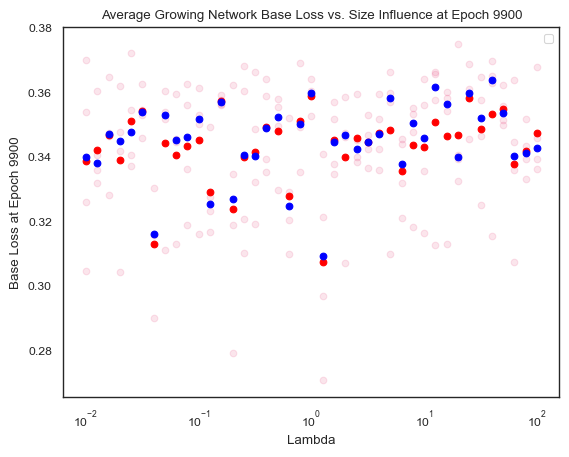

In [97]:
from matplotlib.collections import LineCollection
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Slice to get the final epoch
epoch_slice = 9900
final_losses = static_data[static_data[:, 3] == epoch_slice]


avg = np.empty((0,0))
med = np.empty((0,0))

plt.xscale("log")

plt.xlabel("Lambda")
plt.ylabel(f"Base Loss at Epoch {epoch_slice}")
plt.title(f"Average Growing Network Base Loss vs. Size Influence at Epoch {epoch_slice}")

seed_list = np.unique(final_losses[:, 0])
seed_max = np.max(seed_list)

for i in seed_list:
  final_losses_seed = final_losses[final_losses[:, 0] == i]
  color = ((float(i)/seed_max)**2 * 0.9, 0.0, 0.3)
  plt.scatter(x=final_losses_seed[:, 9], y=final_losses_seed[:, 4], color=color, alpha=0.1)


# For each size influence, take the average of all of the final losses
for i in np.unique(final_losses[:, -1]):
  # print(f"{i}, {type(i)}")
  final_losses_inf = final_losses[final_losses[:, -1] == i]
  avg = np.append( avg, np.average(final_losses_inf[:, 4]) )
  med = np.append( med, np.median(final_losses_inf[:, 4]))

  plt.scatter(x=i, y=np.average(final_losses_inf[:, 4]), c="red")
  plt.scatter(x=i, y=np.median(final_losses_inf[:, 4]), c='blue')

# plt.plot(np.unique(final_losses[:, -1]), avg, color="red", label="Average")
# plt.plot(np.unique(final_losses[:, -1]), med, color="blue", label="Median")

plt.legend()
plt.show()


In [27]:
max_lambda_growing = data[data[:, -1] == np.max(data[:, -1])]

max_lambda_seed_9 = max_lambda_growing[max_lambda_growing[:, 0] == 9]

for loss in max_lambda_seed_9[:, 4]:
  print(loss)

print(max_lambda_growing)

[[971 'Bessel_Growing' 10 ... 0.001 10000 100.0]
 [971 'Bessel_Growing' 10 ... 0.001 10000 100.0]
 [971 'Bessel_Growing' 10 ... 0.001 10000 100.0]
 ...
 [1052 'Bessel_Growing' 10 ... 0.001 10000 100.0]
 [1052 'Bessel_Growing' 10 ... 0.001 10000 100.0]
 [1052 'Bessel_Growing' 10 ... 0.001 10000 100.0]]


In [49]:
statics_avgs = []

print(np.unique(static_data[:, 3]))

# Iterate through all epochs and take average at that epoch
for epoch in np.unique(static_data[:, 3]):
  tpdta = static_data[static_data[:, 3] == epoch]
  # Take the average base loss at this epoch and append it to statics_avgs
  statics_avgs.append(np.average(tpdta[:, 4]))

[0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600
 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000
 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400
 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800
 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200
 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600
 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900]


The cell below calculates the average base loss at a given (lambda, epoch) from all seeds.

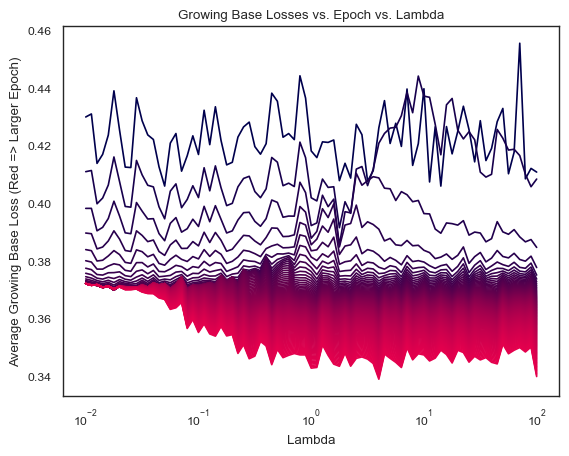

In [89]:
plt.clf()

plt.xscale("log")

plt.xlabel("Lambda")
plt.ylabel("Average Growing Base Loss (Red => Larger Epoch)")
plt.title(f"Growing Base Losses vs. Epoch vs. Lambda")

epochs = np.unique(static_data[:, 3])

# print(f"{epochs.shape} {np.max(epochs)} {np.min(epochs)}")
# print(f"{np.min( data[:, 3]) } {np.max(data[:, 3])}")

for j in epochs:
  # Slice to get desired epoch
  final_losses = data[data[:, 3] == j]
  avg = np.empty((0,0))

  # For each size influence, take the average of all of the final losses
  for i in np.unique(final_losses[:, -1]):
    # print(f"{i}, {type(i)}")
    final_losses_inf = final_losses[final_losses[:, -1] == i]
    
    avg = np.append( avg, np.average(final_losses_inf[:, 4]))
    # plt.scatter(x=i, y=np.average(final_losses_inf[:, 4]), c="red")
    
  color=(np.sqrt((float(j)/10000)) * 0.9, 0.0, 0.3)

  plt.plot(np.unique(final_losses[:, -1]), avg, color = color)

plt.show()

c:\Users\matth\git\Growing Networks\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\matth\git\Growing Networks\.venv\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret / rcount


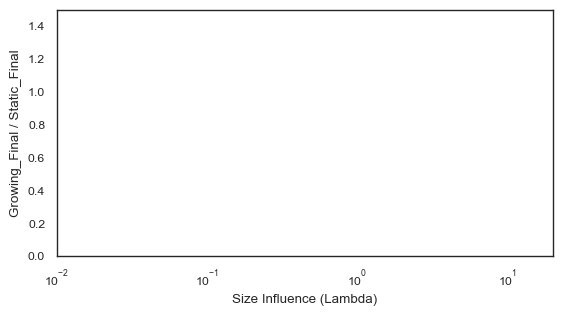

In [9]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))
ratios = []

# Iterate through the specified epochs and plot loss ratio vs. lambda for all of them:
desired_epochs= np.linspace(100, 4900, num=49)
# Expected contents are [100, 200, 300, ... , 4900]

for _Epoch in desired_epochs:
  final_losses = data[data[:, 3] ==  _Epoch]

  growing = final_losses[final_losses[:, 1] == "Bessel_Growing"]
  grown = final_losses[final_losses[:, 1] == "Bessel_Grown"]

  growing_finals_avgs = []
  static_finals_avgs = []

  lambdas = [0.01, 0.02, 0.1, 0.2, 1.0, 2.0, 10.0, 20.0]

  for size_loss in lambdas:
    growing_finals_avgs.append(np.average(growing[growing[:, 9] == size_loss][:, 4], weights=None))
    static_finals_avgs.append(np.average(grown[grown[:, 9] == size_loss][:, 4], weights=None))

  current_ratio = []

  for i in range(len(lambdas)):
    current_ratio.append([lambdas[i], growing_finals_avgs[i]/static_finals_avgs[i]])
  #   print(f"grow={growing_finals_avgs[i]},static={static_finals_avgs[i]},ratio={ratio[i]}")

  ratios.append(current_ratio)

colors = []

max_epoch = np.max(desired_epochs)
for epoch in desired_epochs:
  colors.append( ((epoch/max_epoch)**2 * 0.9, 0.0, 0.3) )

ax.add_collection(LineCollection(ratios, linewidths=0.8, colors=colors))

plt.xscale("log")
plt.xlabel("Size Influence (Lambda)")
plt.ylabel("Growing_Final / Static_Final")

plt.xlim((0.01,20.0))
plt.ylim((0,1.5))

plt.show()

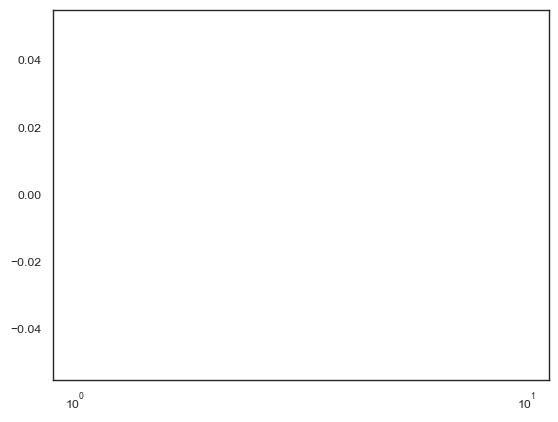

In [10]:
plt.clf()

final_losses = data[data[:, 3] ==  4900]

growing = final_losses[final_losses[:, 1] == "Bessel_Growing"]
grown = final_losses[final_losses[:, 1] == "Bessel_Grown"]

growing_finals_avgs = []
static_finals_avgs = []

lambdas = [0.01, 0.02, 0.1, 0.2, 1.0, 2.0, 10.0, 20.0]

for size_loss in lambdas:
  growing_finals_avgs.append(np.average(growing[growing[:, 9] == size_loss][:, 4], weights=None))
  static_finals_avgs.append(np.average(grown[grown[:, 9] == size_loss][:, 4], weights=None))

current_ratio = []

for i in range(len(lambdas)):
  current_ratio.append(growing_finals_avgs[i]/static_finals_avgs[i])
  #   print(f"grow={growing_finals_avgs[i]},static={static_finals_avgs[i]},ratio={ratio[i]}")

plt.plot(lambdas, current_ratio)
plt.xscale("log")

plt.show()

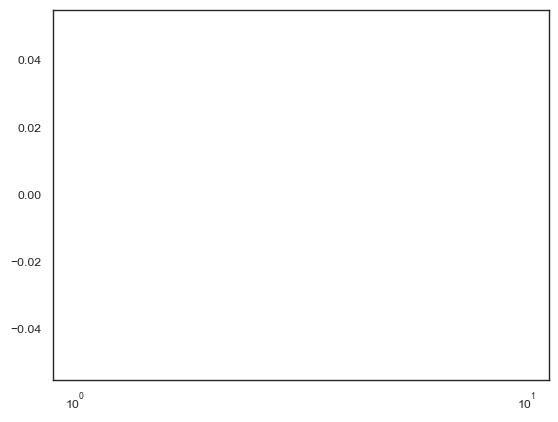

In [11]:
plt.plot(lambdas, static_finals_avgs, label="Fixed")
plt.xscale("log")

In [81]:
# Clean the control signal into a float
print(type(data[0][6]))

for row in data:
  row[6] = float(row[6][1:-1])

print(type(data[0][6]))
print(data[55][6])

<class 'float'>


TypeError: 'float' object is not subscriptable

In [31]:
outdata = np.concatenate((data, static_data), axis=0)

print(data.shape)

(324000, 10)


In [39]:
print(np.unique(outdata[:, 9]))

o = pd.DataFrame(outdata)
o = o.rename(columns={0: 'Seed', 1: 'Network_Type', 2: 'N_max', 3:  'Epoch', 4: 'Base_Loss',
                      5: 'Size_Loss', 6: 'Hidden_Layer_Size', 7: 'Learning_Rate', 8: 'Max_Epochs', 9: 'Size_Influence'})

o.to_csv("aggregated_run_data.csv")

[0.01 0.0112202 0.0125893 0.0141254 0.0158489 0.0177828 0.0199526
 0.0223872 0.0251189 0.0281838 0.0316228 0.0354813 0.0398107 0.0446684
 0.0501187 0.0562341 0.0630957 0.0707946 0.0794328 0.0891251 0.1 0.112202
 0.125893 0.141254 0.158489 0.177828 0.199526 0.223872 0.251189 0.281838
 0.316228 0.354813 0.398107 0.446684 0.501187 0.562341 0.630957 0.707946
 0.794328 0.891251 1.0 1.12202 1.25893 1.41254 1.58489 1.77828 1.99526
 2.23872 2.51189 2.81838 3.16228 3.54813 3.98107 4.46684 5.01187 5.62341
 6.30957 7.07946 7.94328 8.91251 10.0 11.2202 12.5893 14.1254 15.8489
 17.7828 19.9526 22.3872 25.1189 28.1838 31.6228 35.4813 39.8107 44.6684
 50.1187 56.2341 63.0957 70.7946 79.4328 89.1251 100.0]


c:\Users\matth\git\Growing Networks\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\matth\git\Growing Networks\.venv\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret / rcount


<Figure size 640x480 with 0 Axes>

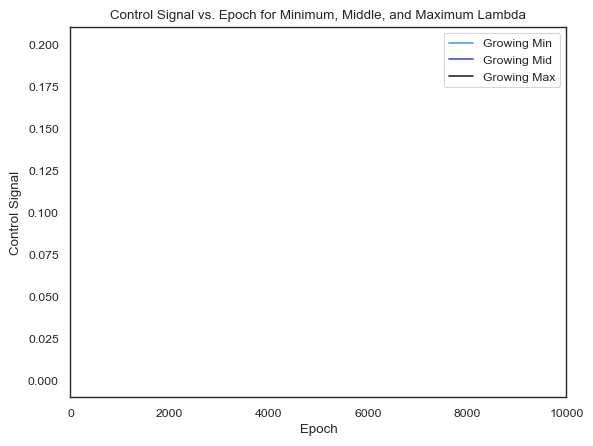

In [88]:
# Found columns: Index(['Seed', 'Network_Type', 'N_max', 'Epoch', 'Base_Loss', 'Size_Loss',
#        'Hidden_Layer_Size', 'Learning_Rate', 'Num_Epochs', 'Size_Influence'],
#       dtype='object')

plt.clf()

mean_growing_control_min = []
mean_growing_control_med = []
mean_growing_control_max = []
epochs = np.linspace(0, 10000, 100)

plt.figure()

g = data[data[:, 1] == "Bessel_Growing"]

# Take the minimum, median, and maximum size influences and separate them out
g_min = g[g[:, 9] == np.min(g[:, 9])]
g_mid = g[g[:, 9] == np.median(g[:, 9])]
g_max = g[g[:, 9] == np.max(g[:, 9])]

for e in epochs:
  # Calculate the average signal at epoch 'e' for the networks for lambda min, middle, and max
  mean_growing_control_min.append(np.average(g_min[g_min[:, 3] == e][:, 6]))
  mean_growing_control_med.append(np.average(g_mid[g_mid[:, 3] == e][:, 6]))
  mean_growing_control_max.append(np.average(g_max[g_max[:, 3] == e][:, 6]))


plt.plot(epochs, mean_growing_control_min, label="Growing Min")
plt.plot(epochs, mean_growing_control_med, label="Growing Mid")
plt.plot(epochs, mean_growing_control_max, label="Growing Max")

plt.legend()

plt.xlim(0, 10000)
plt.xlabel("Epoch")
plt.ylabel("Control Signal")

plt.title("Control Signal vs. Epoch for Minimum, Middle, and Maximum Lambda")

plt.show()

c:\Users\matth\git\Growing Networks\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\matth\git\Growing Networks\.venv\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret / rcount


<Figure size 640x480 with 0 Axes>

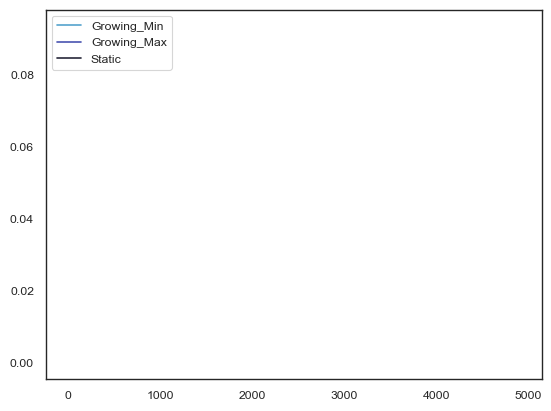

In [10]:
plt.clf()

mean_static_control = []
mean_growing_control_min = []
mean_growing_control_max = []

# Generate [0, 100, 200, 300, ... , 4900]
epochs = np.linspace(0, 4900, 100)

g = data[data[:, 1] == "Bessel_Growing"]
s = data[data[:, 1] == "Bessel_Grown"]

g_min = g[g[:, 9] == 0.01]
g_max = g[g[:, 9] == 20.0]

for e in epochs:
  # Calculate the average at epoch 'e' for the growing and static networks
  mean_growing_control_min.append(np.average(g_min[g_min[:, 3] == e][:, 6]))
  mean_growing_control_max.append(np.average(g_max[g_max[:, 3] == e][:, 6]))

  mean_static_control.append(np.average(s[s[:, 3] == e][:, 6]))

  # [0.01, 20.0]

plt.figure()

plt.plot(epochs, mean_growing_control_min, label="Growing_Min")
plt.plot(epochs, mean_growing_control_max, label="Growing_Max")
plt.plot(epochs, mean_static_control, label="Static")

plt.legend()
plt.show()